In [2]:
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv('../Data_with_NumMosquitos/aggregated_train_with_nummosquitos.csv')

In [4]:
df.head()

,Unnamed: 0,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,...,19_week_avrgPrecipTotal,19_week_avrgTavg,20_week_avrgPrecipTotal,20_week_avrgTavg,21_week_avrgPrecipTotal,21_week_avrgTavg,22_week_avrgPrecipTotal,22_week_avrgTavg,23_week_avrgPrecipTotal,23_week_avrgTavg
0,0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,...,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862
1,1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,...,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862
2,2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,...,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862
3,3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,...,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862
4,4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,...,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862,0.062586,63.275862


In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent', 'Station', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Year', 'Month', 'Tavg_week', 'precip_week', 'heat_dw', 'cool_dw', '1_week_avrgPrecipTotal', '1_week_avrgTavg', '2_week_avrgPrecipTotal', '2_week_avrgTavg', '3_week_avrgPrecipTotal', '3_week_avrgTavg', '4_week_avrgPrecipTotal', '4_week_avrgTavg', '5_week_avrgPrecipTotal', '5_week_avrgTavg', '6_week_avrgPrecipTotal', '6_week_avrgTavg', '7_week_avrgPrecipTotal', '7_week_avrgTavg', '8_week_avrgPrecipTotal', '8_week_avrgTavg', '9_week_avrgPrecipTotal', '9_week_avrgTavg', '10_week_avrgPrecipTotal', '10_week_avrgTavg', '11_week_avrgPrecipTotal', '11_week_avrgTavg', '12_week_avrgPrecipTotal', '12_week_a

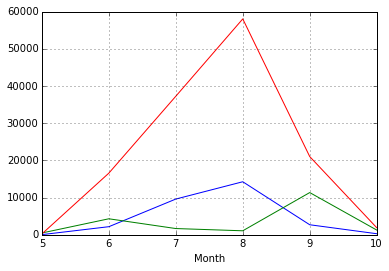

In [6]:
#df.groupby(['month']).sum()['Heat_x'].plot()
#df.groupby(['month']).sum()['Heat_y'].plot()
df.groupby(['Month']).sum()['heat_dw'].plot()
df.groupby(['Month']).sum()['cool_dw'].plot()
df.groupby(['Month']).sum()['NumMosquitos'].plot()
#df.groupby(['Month']).sum()['WnvPresent'].plot()
#df.groupby(['Month']).sum()['PrecipTotal'].plot()


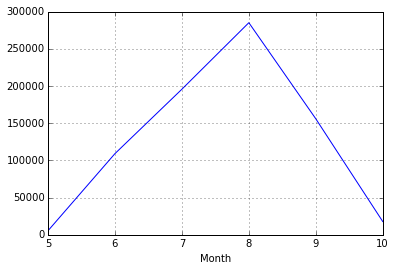

In [10]:
df.groupby(['Month']).sum()['Tavg'].plot()


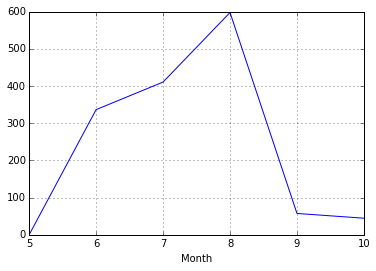

In [7]:
df.groupby(['Month']).sum()['PrecipTotal'].plot()

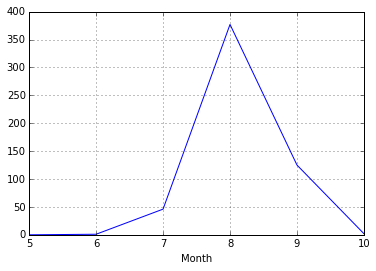

In [39]:
df.groupby(['Month']).sum()['WnvPresent'].plot()

# use exponentially weighted moving average?


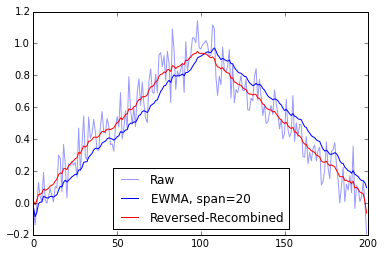

In [9]:
import matplotlib.pyplot as plt
import pandas, numpy as np
%matplotlib inline
ewma = pandas.stats.moments.ewma

# make a hat function, and add noise
x = np.linspace(0,1,100)
x = np.hstack((x,x[::-1]))
x += np.random.normal( loc=0, scale=0.1, size=200 )
plt.plot( x, alpha=0.4, label='Raw' )

# take EWMA in both directions with a smaller span term
fwd = ewma( x, span=15 )          # take EWMA in fwd direction
bwd = ewma( x[::-1], span=15 )    # take EWMA in bwd direction
c = np.vstack(( fwd, bwd[::-1] )) # lump fwd and bwd together
c = np.mean( c, axis=0 )          # average  

# regular EWMA, with bias against trend
plt.plot( ewma( x, span=20 ), 'b', label='EWMA, span=20' )

# "corrected" (?) EWMA
plt.plot( c, 'r', label='Reversed-Recombined' )

plt.legend(loc=8)
plt.savefig( 'ewma_correction.png', fmt='png', dpi=100 )

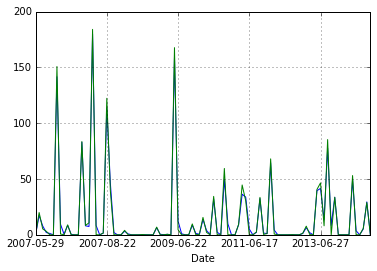

In [43]:
df['exp_mov_PrecipTotal'] = ewma(df.PrecipTotal,span=21)
df.groupby(['Date']).sum()['exp_mov_PrecipTotal'].plot()
df.groupby(['Date']).sum()['PrecipTotal'].plot()

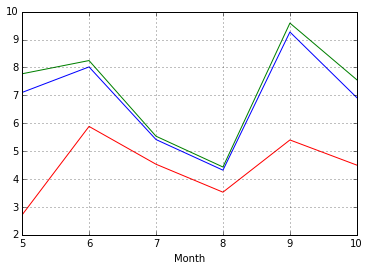

In [32]:
df['exp_mov_Tavg'] = ewma(df.Tavg,span=21)
df.groupby(['Month']).std()['exp_mov_Tavg'].plot()
df.groupby(['Month']).std()['Tavg'].plot()
df.groupby(['Month']).std()['1_week_avrgTavg'].plot()
